<h1>Project Name - Restaurant Analysis</h1>
<ol>
<li><b>Project Type</b> - EDA
<li><b>Industry </b>- Cognifyz Technologies
<li><b>Contribution </b>- Individual
<li><b>Member Name</b> - Krishi Devani
<li><b>Level</b> - 3
</ol>

<h3>Level 3 Tasks:</h3>
<h4>Task 1: Predictive Modeling</h4>
<ol>
<li>Build a regression model to predict the
aggregate rating of a restaurant based on
available features.
Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.</li>
<li>Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.</li>


</ol>
<h4>Task 2: Customer Preference Analysis</h4>
<ol>
<li>Analyze the relationship between the type of
cuisine and the restaurant's rating.</li>
<li>Identify the most popular cuisines among
customers based on the number of votes.</li>
<li>Determine if there are any specific cuisines
that tend to receive higher ratings.</li>

</ol>

<h4>Task 3: Data Visualization</h4>
<ol>
<li>Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).</li>
<li>Compare the average ratings of different cuisines
or cities using appropriate visualizations.</li>
<li>Visualize the relationship between various
features and the target variable to gain insights.</li>
</ol>

<h1>Task 1: Predictive Modeling</h1>

In [22]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("Dataset.csv")
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [26]:
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = df[features]
y = df[target]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(" ")

Model: Linear Regression
Mean Squared Error: 1.6764802747031442
R-squared: 0.2634446409021949
 
Model: Decision Tree
Mean Squared Error: 0.2083062348751632
R-squared: 0.9084814322328038
 
Model: Random Forest
Mean Squared Error: 0.1341795523461434
R-squared: 0.9410487138720458
 


<h1>Task 2: Customer Preference Analysis</h1>

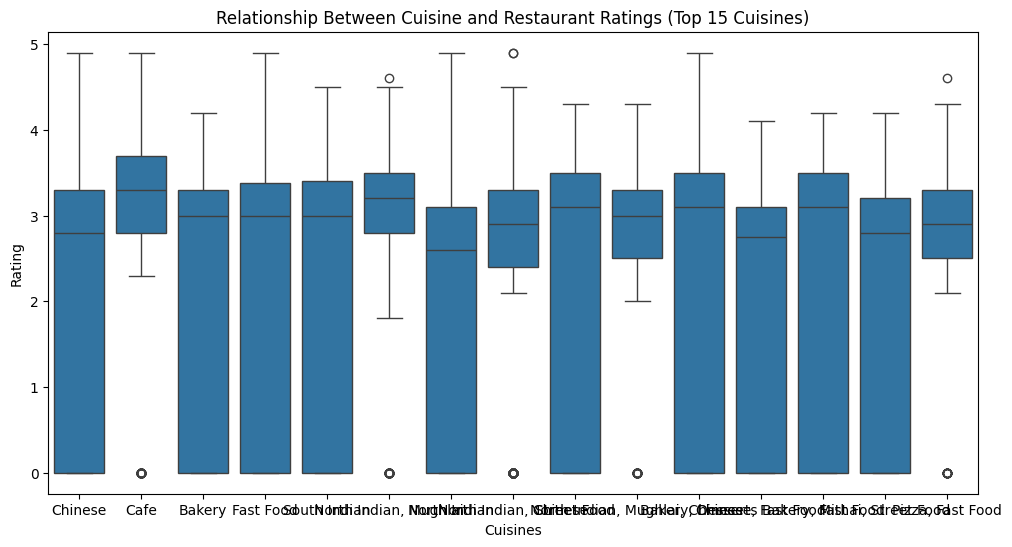

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
top_n = 15
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index


df_filtered = df[df['Cuisines'].isin(top_cuisines)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating')

plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')

plt.show()

In [30]:

# Identifying most popular cuisines based on number of votes
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)

# Display result
print(f"Top Cuisines by Number of Votes:{top_cuisines}")


Top Cuisines by Number of Votes:Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


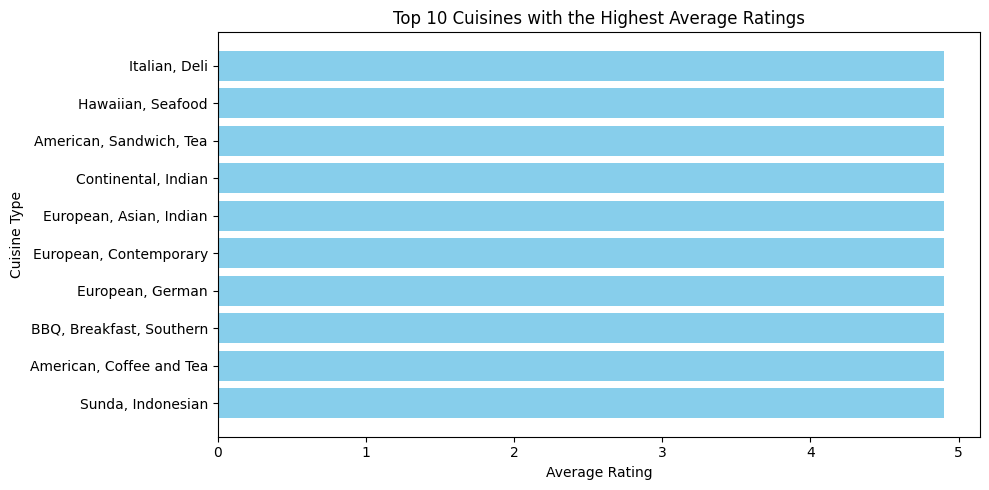

In [31]:
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

# Set labels
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()
plt.tight_layout()

# Display Chart

<h1>Task 3: Data Visualization</h1>

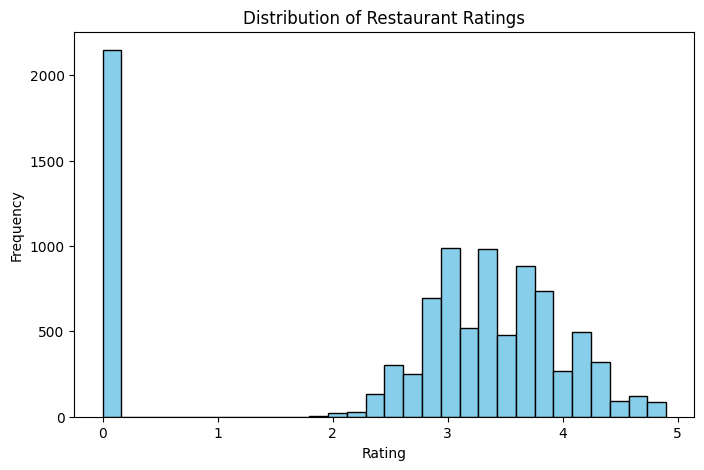

In [32]:

# Distribution of ratings by using a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')

# Display Chart
plt.show()

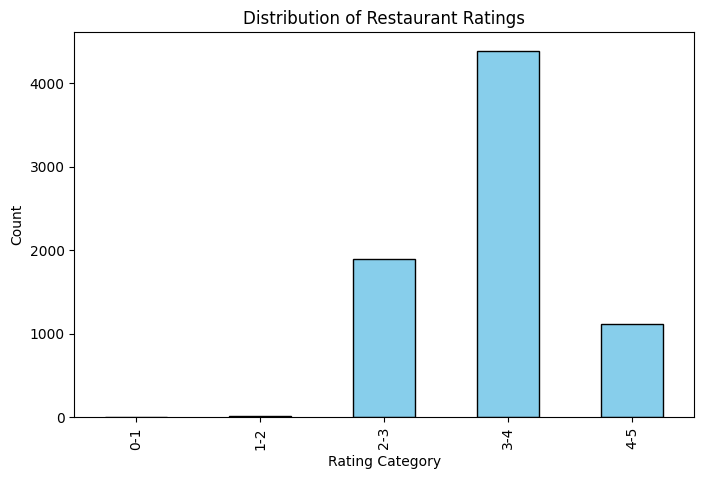

In [21]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)

rating_counts = df['Rating Category'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')


plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')


plt.show()

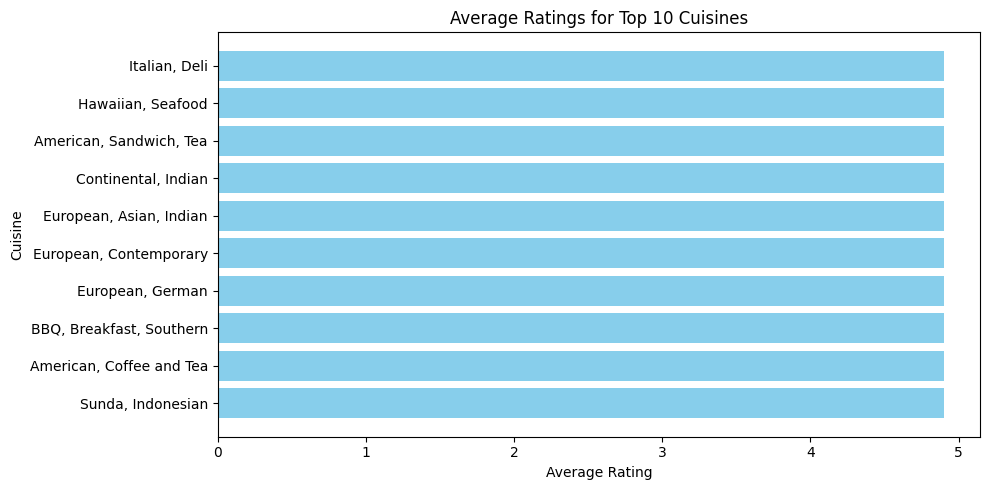

In [33]:

cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')


plt.ylabel('Cuisine')
plt.xlabel('Average Rating')
plt.title('Average Ratings for Top 10 Cuisines')
plt.gca().invert_yaxis()
plt.tight_layout()


plt.show()

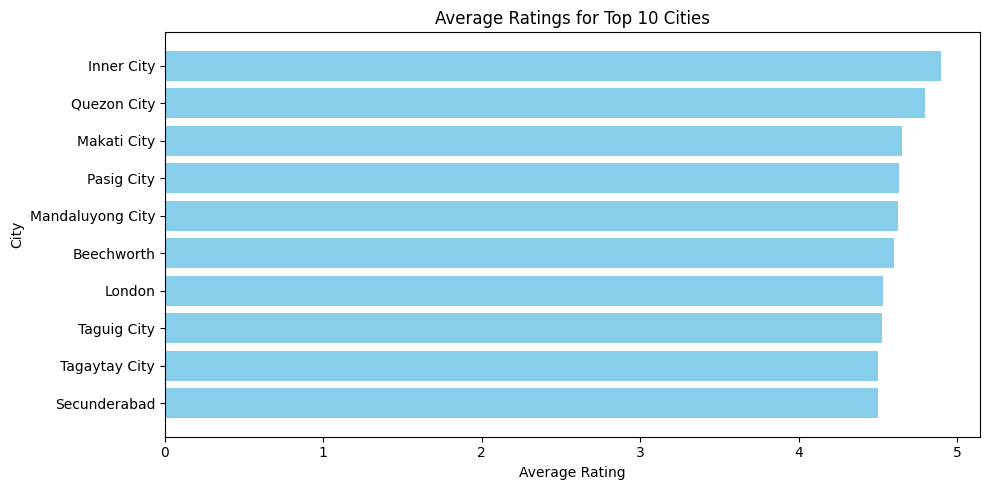

In [34]:

city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)


plt.figure(figsize=(10, 5))
plt.barh(city_ratings['City'][:10], city_ratings['Aggregate rating'][:10], color='skyblue')


plt.ylabel('City')
plt.xlabel('Average Rating')
plt.title(f'Average Ratings for Top 10 Cities')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

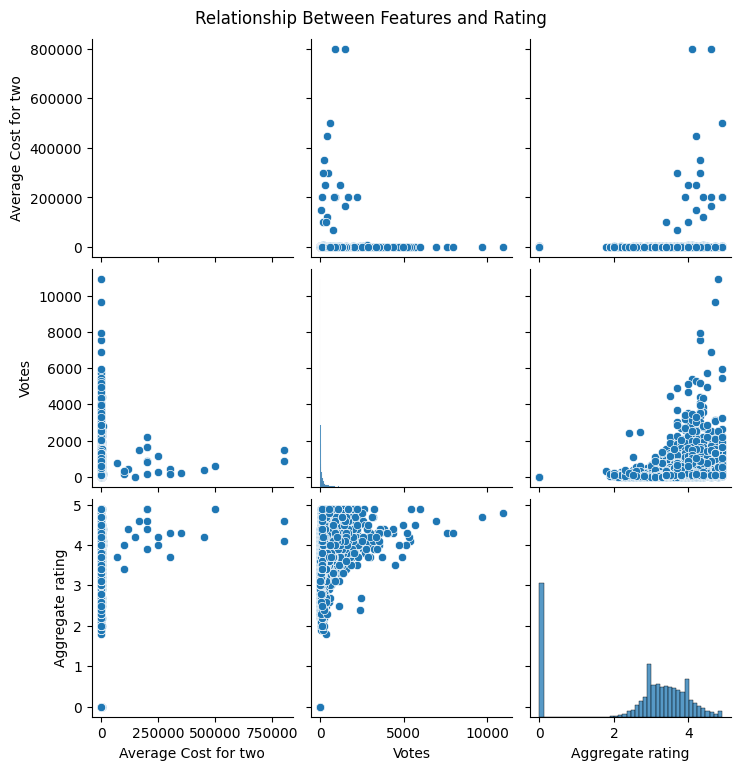

In [20]:
# Visualizing the relationship between various features and the target variable by using pair plot
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)

# Display Chart
plt.show()